In [1]:
import math
import matplotlib.pyplot as plt
import keras
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.utils import plot_model
from keras.models import Model
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import *
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping


In [2]:
df=pd.read_csv("/content/DHAKABANK.csv",parse_dates=['DATE'])
df.head()

#       DATE TRADING CODE  LTP*  ...   YCP  TRADE  VALUE (mn)     VOLUME
0  439 2018-05-08    DHAKABANK  14.3  ...  14.2  538.0      30.013  2088763.0
1  438 2018-06-08    DHAKABANK  13.6  ...  14.3  625.0      45.679  3316895.0
2  437 2018-07-08    DHAKABANK  13.8  ...  13.7  464.0      30.636  2199851.0
3  436 2018-08-08    DHAKABANK  14.3  ...  13.9  675.0      48.724  3426870.0
4  435 2018-09-08    DHAKABANK  14.8  ...  14.4  868.0      70.769  4772611.0

[5 rows x 12 columns]

In [3]:
# Sort DataFrame by date
df = df.sort_values('DATE')

# Double check the result
df.head()


#       DATE TRADING CODE  LTP*  ...   YCP  TRADE  VALUE (mn)     VOLUME
36  403 2018-01-10    DHAKABANK  14.3  ...  14.3  183.0      10.302   720101.0
59  380 2018-01-11    DHAKABANK  14.1  ...  14.3  109.0       7.905   555214.0
37  402 2018-02-10    DHAKABANK  14.5  ...  14.3  188.0      14.376  1001308.0
79  360 2018-02-12    DHAKABANK  14.2  ...  14.1  199.0       9.782   692390.0
16  423 2018-03-09    DHAKABANK  15.8  ...  16.5  713.0      70.583  4386733.0

[5 rows x 12 columns]

In [4]:

df = df.set_index('DATE')
df.head(3)


# TRADING CODE  LTP*  HIGH  ...   YCP  TRADE  VALUE (mn)     VOLUME
DATE                                      ...                                    
2018-01-10  403    DHAKABANK  14.3  14.4  ...  14.3  183.0      10.302   720101.0
2018-01-11  380    DHAKABANK  14.1  14.3  ...  14.3  109.0       7.905   555214.0
2018-02-10  402    DHAKABANK  14.5  14.5  ...  14.3  188.0      14.376  1001308.0

[3 rows x 11 columns]

In [5]:
df['daily_ret'] = df['CLOSEP*'].pct_change()
df['daily_ret'] = df['daily_ret'].fillna(0.0)

In [6]:
df['volatility']= df['daily_ret'].rolling(window=21).std()
df['volatility'] = df['volatility'].fillna(0.0)

In [7]:
df['volatility'] = df['volatility']*100

In [8]:
import matplotlib.pyplot as plt 

In [9]:
df=df.reset_index()['volatility']

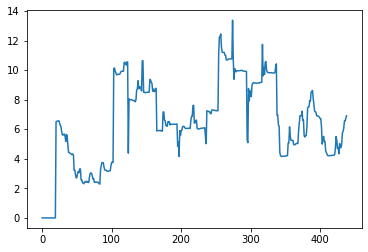

In [10]:
plt.plot(df)

In [11]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df=scaler.fit_transform(np.array(df).reshape(-1,1))

In [12]:
##splitting dataset into train and test split where train=70 percent and test=30 percent
training_size=int(len(df)*0.70)
test_size=len(df)-training_size
train_data,test_data=df[0:training_size,:],df[training_size:len(df),:1]




In [13]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [],[]
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [14]:

# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [15]:

print(X_train.shape), print(y_train.shape)

(206, 100)
(206,)


(None, None)

In [16]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [ ]:
X_test.shape

In [17]:
filepath1 = "/content/drive/MyDrive/StockPriceEnsembleDL/modelsDhakabank/model1.h5"
filepath2 = "/content/drive/MyDrive/StockPriceEnsembleDL/modelsDhakabank/model2.h5"
filepath3 = "/content/drive/MyDrive/StockPriceEnsembleDL/modelsDhakabank/model3.h5"

In [18]:

#1D cnn model
# define model
model1 = Sequential()
model1.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(100,1)))
model1.add(MaxPooling1D(pool_size=2))
model1.add(Flatten())
model1.add(Dense(50, activation='relu'))
model1.add(Dense(1))
model1.compile(optimizer='adam', loss='mse')
model1.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=32,verbose=1)


Epoch 1/100
7/7 [==============================] - 1s 88ms/step - loss: 0.1876 - val_loss: 0.0063
Epoch 2/100
7/7 [==============================] - 0s 14ms/step - loss: 0.0497 - val_loss: 0.0786
Epoch 3/100
7/7 [==============================] - 0s 14ms/step - loss: 0.0375 - val_loss: 0.0139
Epoch 4/100
7/7 [==============================] - 0s 14ms/step - loss: 0.0264 - val_loss: 0.0406
Epoch 5/100
7/7 [==============================] - 0s 16ms/step - loss: 0.0247 - val_loss: 0.0180
Epoch 6/100
7/7 [==============================] - 0s 15ms/step - loss: 0.0153 - val_loss: 0.0278
Epoch 7/100
7/7 [==============================] - 0s 14ms/step - loss: 0.0144 - val_loss: 0.0199
Epoch 8/100
7/7 [==============================] - 0s 13ms/step - loss: 0.0135 - val_loss: 0.0163
Epoch 9/100
7/7 [==============================] - 0s 13ms/step - loss: 0.0117 - val_loss: 0.0171
Epoch 10/100
7/7 [==============================] - 0s 13ms/step - loss: 0.0128 - val_loss: 0.0214
Epoch 11/100
7/7 [=

In [19]:
model1.save(filepath1)

In [20]:
#LSTM  model
model2=Sequential()
model2.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model2.add(LSTM(50,return_sequences=True))
model2.add(LSTM(50))
model2.add(Dense(1))
model2.compile(loss='mean_squared_error', optimizer='adam')
model2.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=32,verbose=1)

Epoch 1/100
7/7 [==============================] - 7s 339ms/step - loss: 0.2477 - val_loss: 0.1050
Epoch 2/100
7/7 [==============================] - 1s 153ms/step - loss: 0.0548 - val_loss: 0.0062
Epoch 3/100
7/7 [==============================] - 1s 159ms/step - loss: 0.0334 - val_loss: 0.0139
Epoch 4/100
7/7 [==============================] - 1s 156ms/step - loss: 0.0184 - val_loss: 0.0391
Epoch 5/100
7/7 [==============================] - 1s 159ms/step - loss: 0.0178 - val_loss: 0.0132
Epoch 6/100
7/7 [==============================] - 1s 160ms/step - loss: 0.0162 - val_loss: 0.0217
Epoch 7/100
7/7 [==============================] - 1s 156ms/step - loss: 0.0159 - val_loss: 0.0273
Epoch 8/100
7/7 [==============================] - 1s 155ms/step - loss: 0.0145 - val_loss: 0.0183
Epoch 9/100
7/7 [==============================] - 1s 162ms/step - loss: 0.0179 - val_loss: 0.0210
Epoch 10/100
7/7 [==============================] - 1s 163ms/step - loss: 0.0183 - val_loss: 0.0210
Epoch 11/

In [21]:
model2.save(filepath2)

In [22]:
#BILSTM model
model3=Sequential()
model3.add(Bidirectional(LSTM(50,return_sequences=True,input_shape=(100,1))))
model3.add(Bidirectional(LSTM(50,return_sequences=True)))
model3.add(Bidirectional(LSTM(50)))
model3.add(Dense(1))
model3.compile(loss='mean_squared_error', optimizer='adam')
model3.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=32,verbose=1)

Epoch 1/100
7/7 [==============================] - 16s 638ms/step - loss: 0.2493 - val_loss: 0.2088
Epoch 2/100
7/7 [==============================] - 2s 254ms/step - loss: 0.0524 - val_loss: 0.0112
Epoch 3/100
7/7 [==============================] - 2s 262ms/step - loss: 0.0285 - val_loss: 0.0528
Epoch 4/100
7/7 [==============================] - 2s 256ms/step - loss: 0.0221 - val_loss: 0.0432
Epoch 5/100
7/7 [==============================] - 2s 253ms/step - loss: 0.0165 - val_loss: 0.0158
Epoch 6/100
7/7 [==============================] - 2s 258ms/step - loss: 0.0183 - val_loss: 0.0380
Epoch 7/100
7/7 [==============================] - 2s 258ms/step - loss: 0.0147 - val_loss: 0.0192
Epoch 8/100
7/7 [==============================] - 2s 258ms/step - loss: 0.0141 - val_loss: 0.0171
Epoch 9/100
7/7 [==============================] - 2s 254ms/step - loss: 0.0106 - val_loss: 0.0144
Epoch 10/100
7/7 [==============================] - 2s 257ms/step - loss: 0.0122 - val_loss: 0.0084
Epoch 11

In [23]:
model3.save(filepath3)

In [24]:
from keras.models import load_model

In [26]:
# create list of loaded models use  load_model() 
all_models = list()
for i in range(3):
  filename = '/content/drive/MyDrive/StockPriceEnsembleDL/modelsDhakabank/model'+str(i+1)+'.h5'
  model = load_model(filename)
  all_models.append(model)

In [ ]:
print(len(all_models))

In [27]:
# perform test prediction with per models 
#model1
f1 = '/content/drive/MyDrive/StockPriceEnsembleDL/modelsDhakabank/model1.h5'
model = load_model(f1)


In [28]:

test_preds = model.predict(X_test)
print(test_preds.shape)
print(type(test_preds))

(31, 1)
<class 'numpy.ndarray'>


In [29]:
test_preds = np.reshape(test_preds,(1, test_preds.size))
test_predict=scaler.inverse_transform(test_preds)
X = np.reshape(ytest,(1, ytest.size))
Y_test =scaler.inverse_transform(X)

In [30]:

#Y_test = Y_test.transpose()
RMSE = math.sqrt(mean_squared_error(Y_test,test_preds))
RMSE

4.412554703879999

In [31]:

# stacked generalization with linear meta model on blobs dataset
from sklearn.datasets import make_blobs
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from keras.models import load_model
from keras.utils import to_categorical
from numpy import dstack

In [32]:
def DataPrep(datax):
  test_preds = np.reshape(datax,(1, datax.size))
  test_predict=scaler.inverse_transform(test_preds)
  return datax



In [33]:
def stacked_dataset(allModels, inputX):
	stackX = None
	for model in allModels:
		# make prediction
		yhat = model.predict(inputX, verbose=0)
		# stack predictions into [rows, members, probabilities]
		if stackX is None:
			stackX = yhat
		else:
			stackX = dstack((stackX, yhat))
	# flatten predictions to [rows, members x probabilities]
	
	return stackX

In [34]:
# fit a model based on the outputs from the ensemble members
def fit_stacked_model(members, inputX, inputy):
	# create dataset using ensemble
	stackedX = stacked_dataset(members, inputX)
	# fit standalone model
	model = LinearRegression()
	model.fit(stackedX, inputy)
	return model

In [35]:
#make prediction with stacked model

def stacked_prediction(members, model, inputX):
  #inputX = DataPrep(inputX)
	stackedX = stacked_dataset(members,inputX)
	# make a prediction
	yhat = model.predict(stackedX)
	return yhat

In [36]:
#started from here
for i in range(len(all_models)):
	model = all_models[i]
	for layer in model.layers:
		# make not trainable
		layer.trainable = False
		# rename to avoid 'unique layer name' issue
		layer._name = 'ensemble_' + str(i+1) + '_' + layer.name

In [37]:

# define stacked model from multiple member input models
def define_stacked_model(members):
	# update all layers in all models to not be trainable
	for i in range(len(members)):
		model = members[i]
		for layer in model.layers:
			# make not trainable
			layer.trainable = False
			# rename to avoid 'unique layer name' issue
			layer._name = 'ensemble_' + str(i+1) + '_' + layer.name
	# define multi-headed input
	ensemble_visible = [model.input for model in members]
	# concatenate merge output from each model
	ensemble_outputs = [model.output for model in members]
	merge = concatenate(ensemble_outputs)
	hidden = Dense(10, activation='relu')(merge)
	output = Dense(3)(hidden)
	model = Model(inputs=ensemble_visible, outputs=output)
	model = Model(inputs=ensemble_visible, outputs=output)
	# plot graph of ensemble
	plot_model(model, show_shapes=True, to_file='model_graph.png')
	# compile
	# compile
	model.compile(optimizer='adam', loss='mse')
	return model

In [38]:

def fit_stacked_model(model, inputX, inputy):
	# prepare input data
	X = [inputX for _ in range(len(model.input))]
	# encode output data
	#inputy_enc = to_categorical(inputy)
	# fit model
	model.fit(X, inputy, epochs=300, verbose=0)

In [39]:
stacked_model = define_stacked_model(all_models)

In [40]:
#fit stacked model on test dataset
fit_stacked_model(stacked_model, X_test,ytest)

In [41]:

def predict_stacked_model(model, inputX):
	# prepare input data
	X = [inputX for _ in range(len(model.input))]
	# make prediction
	return model.predict(X)

In [42]:

# make predictions and evaluate
yhat = predict_stacked_model(stacked_model, X_test)
yhat = DataPrep(yhat)
yhat
#Y_test = DataPrep(Y_test)
#RMSE = math.sqrt(mean_squared_error(Y_test,yhat))
#RMSE
#print('Stacked Test Accuracy: %.3f' % RMSE)

array([[0.35833478, 0.35282886, 0.37550524],
       [0.36538267, 0.35951805, 0.3693503 ],
       [0.3456819 , 0.34634942, 0.35982174],
       [0.34476113, 0.34727955, 0.3503368 ],
       [0.337106  , 0.34322888, 0.34147093],
       [0.34003   , 0.34685504, 0.3337015 ],
       [0.33315676, 0.3429982 , 0.32796913],
       [0.3033105 , 0.3218541 , 0.32432678],
       [0.307985  , 0.32592982, 0.32224128],
       [0.33177596, 0.3439042 , 0.32149568],
       [0.33363867, 0.3455097 , 0.32186526],
       [0.32046562, 0.33579654, 0.32303518],
       [0.3141501 , 0.3312714 , 0.32526714],
       [0.326132  , 0.34026873, 0.32796326],
       [0.32701242, 0.3411671 , 0.33132774],
       [0.32604945, 0.34072447, 0.3356814 ],
       [0.33392113, 0.3467071 , 0.34407735],
       [0.32502878, 0.3397032 , 0.3602766 ],
       [0.3327487 , 0.34423953, 0.37486973],
       [0.357876  , 0.36193275, 0.3830914 ],
       [0.3638836 , 0.36626554, 0.38878796],
       [0.39458704, 0.38947248, 0.38864976],
       [0.

In [43]:
yhat=scaler.inverse_transform(yhat)

In [44]:
x, y, z = yhat.T

In [45]:
avg = (x+y+z)/3

In [46]:
avg = np.reshape(avg,(1, avg.size))
x = np.reshape(x,(1, x.size))
y = np.reshape(y,(1, y.size))
z = np.reshape(z,(1, z.size))

In [47]:
RMSE = math.sqrt(mean_squared_error(Y_test,avg))
RMSE

0.4413900547199717

In [48]:
RMSE = math.sqrt(mean_squared_error(Y_test,x))
RMSE

0.4411123019992873

In [49]:
RMSE = math.sqrt(mean_squared_error(Y_test,y))
RMSE

0.4911900228088969

In [50]:
RMSE = math.sqrt(mean_squared_error(Y_test,z))
RMSE

0.44024904506908785